# 1. Data Loading, Preprocessing, and Cleaning

**Jordan Miranda**

**Course: BrainStation Data Science**

**Next Notebook: 2. Initial EDA**

The goal of our overall project is identify players of similar playstyles via their metrics, identified through clustering. This will allow clubs to replace players they've found valuable over the years without losing out on their current player's playstyle.

The datasets used for this analysis was acquired on the website [fbref.com](https://fbref.com/) who was provided the analytical data via [StatsBomb](https://statsbomb.com/) a well respected source for soccer analytics. Specifically for our problem we are looking at the *Players Stats* under the [*Big 5 European Leagues*](https://fbref.com/en/comps/Big5/2020-2021/stats/players/2020-2021-Big-5-European-Leagues-Stats) from the soccer seasons beginning in 2010-2011 and ending in 2020-2021, 11 soccer seasons worth of data. The web developers at fbref were kind enough to add a *Share & Export* dropdown menu that allowed the tables for each season be exported as a `.csv`.

The data in our dataset is a snapshot of each player's season from the years 2010-2021. As our cutoff was last season, all player data should be complete and set in stone as the most recent season in our dataset has finished. We opted not to take the current season being played (2021-2022) as the data would be continuously updated week-after-week as the players play and could therefore change our analysis as the weeks pass. 

There should be no need for supplementary data sources excluding a possible case of missing values. If our datasets from fbref are missing values we will head to [transfermarkt.com](https://www.transfermarkt.com/), a leading source for 3rd party player stats and market valuations. This website allows you to search any given player across the world's leagues and search by season for their metrics.

Now that we know about what our dataset is and where it came from, let's read in each year's `.csv` and begin to take a look at the data.

First and foremost, we'll need to import our standard tools for our data loading, preprocessing, and cleaning.

In [1]:
# loading in the standard toolbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

## Reading in CSVs

Were going to read in the datasets one-by-one. While this is a tedious process that we acknowledge can be done in a for loop, it's preferred this way as we'd like to ensure that we're reading in the correct dataset for each year. The way we will check that we didn't duplicate a season is if one player (we can find one using `.head()`) in our previous years dataset is in the next year's dataset and their `Age` column has increased by 1. This will let us know that we're on the right track reading in our seasons. 

Again, we recognize it's a tedious and methodical process but as a professor of mine has said - "Haste makes waste". With that being said, let's begin reading in our seasons starting with the 2010-2011 season.

In [2]:
# reading in csv
stats10_11_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-10-11.csv")
# checking it worked 
stats10_11_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Fernando Menegazzo\Fernando-Menegazzo,br BRA,MF,Bordeaux,fr Ligue 1,29.0,1981,35,34,2945,32.7,2,1.0,2,0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,Matches
1,2,Sergio Abad Beyxer\Sergio-Abad-Beyxer,es ESP,MF,Levante,es La Liga,21.0,1989,1,0,5,0.1,0,0.0,0,0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
2,3,Ignazio Abate\Ignazio-Abate,it ITA,DFMF,Milan,it Serie A,23.0,1986,29,26,2412,26.8,0,1.0,0,0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,Matches
3,4,Christian Abbiati\Christian-Abbiati,it ITA,GK,Milan,it Serie A,33.0,1977,35,35,3078,34.2,0,0.0,0,0,0.0,2,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Mohammed Abdellaoue\Mohammed-Abdellaoue,no NOR,FW,Hannover 96,de Bundesliga,24.0,1985,26,26,2086,23.2,10,1.0,10,0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,Matches


In [3]:
stats11_12_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-11-12.csv")
stats11_12_df.head()
# ignazio abate went from 23 to 24 - looks good!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Wigan Athletic,eng Premier League,20,1990,3,3,270,3.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Ignazio Abate\Ignazio-Abate,it ITA,DFMF,Milan,it Serie A,24,1986,29,29,2597,28.9,0,2,0,0,0,4,0,0.00,0.07,0.07,0.00,0.07,Matches
2,3,Christian Abbiati\Christian-Abbiati,it ITA,GK,Milan,it Serie A,34,1977,31,31,2689,29.9,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
3,4,Mohammed Abdellaoue\Mohammed-Abdellaoue,no NOR,FW,Hannover 96,de Bundesliga,25,1985,28,27,1990,22.1,11,0,8,3,3,2,0,0.50,0.00,0.50,0.36,0.36,Matches
4,5,Aymen Abdennour\Aymen-Abdennour,tn TUN,DF,Toulouse,fr Ligue 1,21,1989,32,32,2880,32.0,2,0,2,0,0,7,0,0.06,0.00,0.06,0.06,0.06,Matches


In [4]:
stats12_13_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-12-13.csv")
stats12_13_df.head()
# ignazio abate went from 24 to 25 - looks good!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Toni Dovale\Toni-Dovale,es ESP,DFMF,Celta Vigo,es La Liga,22.0,1990.0,14,0,270,3.0,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Ignazio Abate\Ignazio-Abate,it ITA,DFMF,Milan,it Serie A,25.0,1986.0,27,25,2291,25.5,0,2,0,0,0,2,0,0.00,0.08,0.08,0.00,0.08,Matches
2,3,Christian Abbiati\Christian-Abbiati,it ITA,GK,Milan,it Serie A,35.0,1977.0,28,28,2444,27.2,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,Matches
3,4,Elvis Abbruscato\Elvis-Abbruscato,it ITA,FW,Pescara,it Serie A,31.0,1981.0,25,11,1148,12.8,2,0,2,0,0,1,0,0.16,0.00,0.16,0.16,0.16,Matches
4,5,Kassim Abdallah\Kassim-Abdallah,km COM,DF,Marseille,fr Ligue 1,25.0,1987.0,13,11,869,9.7,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,0.00,Matches


In [5]:
stats13_14_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-13-14.csv")
stats13_14_df.head()
# ignazio abate went from 25 to 26 - looks good!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Toni Dovale\Toni-Dovale,es ESP,DFMF,Celta Vigo,es La Liga,23.0,1990.0,12,11,994,11.0,0,2,0,0,0,1,0,0.00,0.18,0.18,0.00,0.18,Matches
1,2,Zakariya Abarouai\Zakariya-Abarouai,fr FRA,FW,Evian,fr Ligue 1,19.0,1994.0,1,0,26,0.3,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
2,3,Ignazio Abate\Ignazio-Abate,it ITA,DFMF,Milan,it Serie A,26.0,1986.0,19,16,1464,16.3,1,0,1,0,0,1,0,0.06,0.00,0.06,0.06,0.06,Matches
3,4,Christian Abbiati\Christian-Abbiati,it ITA,GK,Milan,it Serie A,36.0,1977.0,28,28,2390,26.6,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Kassim Abdallah\Kassim-Abdallah,km COM,DF,Evian,fr Ligue 1,26.0,1987.0,11,10,892,9.9,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,0.00,Matches


In [6]:
stats14_15_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-14-15.csv")
stats14_15_df.head()
# ignazio abate went from 26 to 27 - looks good!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Sunderland,eng Premier League,23.0,1990.0,28,26,2307,25.6,0,5,0.0,0.0,0.0,4,0,0.00,0.20,0.20,0.00,0.20,Matches
1,2,Rolando Aarons\Rolando-Aarons,eng ENG,MF,Newcastle Utd,eng Premier League,18.0,1995.0,4,0,132,1.5,1,0,1.0,0.0,0.0,1,0,0.68,0.00,0.68,0.68,0.68,Matches
2,3,Ignazio Abate\Ignazio-Abate,it ITA,DFMF,Milan,it Serie A,27.0,1986.0,23,21,1884,20.9,0,6,0.0,0.0,0.0,5,0,0.00,0.29,0.29,0.00,0.29,Matches
3,4,Christian Abbiati\Christian-Abbiati,it ITA,GK,Milan,it Serie A,37.0,1977.0,11,10,906,10.1,0,0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Kassim Abdallah\Kassim-Abdallah,km COM,DF,Evian,fr Ligue 1,27.0,1987.0,30,29,2581,28.7,0,3,0.0,0.0,0.0,5,1,0.00,0.10,0.10,0.00,0.10,Matches


In [7]:
stats15_16_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-15-16.csv")
stats15_16_df.head()
# ignazio abate went from 27 to 28 - looks good!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Sunderland,eng Premier League,24.0,1990.0,33,33,2970,33.0,4,3,4,0,0,2,0,0.12,0.09,0.21,0.12,0.21,Matches
1,2,Rolando Aarons\Rolando-Aarons,eng ENG,DFMF,Newcastle Utd,eng Premier League,19.0,1995.0,10,3,381,4.2,1,1,1,0,0,1,0,0.24,0.24,0.47,0.24,0.47,Matches
2,3,Ignazio Abate\Ignazio-Abate,it ITA,DF,Milan,it Serie A,28.0,1986.0,27,27,2248,25.0,1,1,1,0,0,7,0,0.04,0.04,0.08,0.04,0.08,Matches
3,4,Christian Abbiati\Christian-Abbiati,it ITA,GK,Milan,it Serie A,38.0,1977.0,1,0,72,0.8,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Aymen Abdennour\Aymen-Abdennour,tn TUN,DF,Valencia,es La Liga,25.0,1989.0,22,22,1851,20.6,0,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,Matches


In [8]:
stats16_17_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-16-17.csv")
stats16_17_df.head()
# ignazio abate went from 28 to 29

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DFMF,Crystal Palace,eng Premier League,25.0,1990.0,11,8,714,7.9,2,0,2,0,0,1,0,0.25,0.00,0.25,0.25,0.25,Matches
1,2,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DFMF,Sunderland,eng Premier League,25.0,1990.0,21,20,1784,19.8,3,1,3,0,0,2,0,0.15,0.05,0.20,0.15,0.20,Matches
2,3,Ignazio Abate\Ignazio-Abate,it ITA,DF,Milan,it Serie A,29.0,1986.0,23,22,1924,21.4,0,2,0,0,0,2,0,0.00,0.09,0.09,0.00,0.09,Matches
3,4,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Dijon,fr Ligue 1,28.0,1987.0,18,15,1314,14.6,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Aymen Abdennour\Aymen-Abdennour,tn TUN,DF,Valencia,es La Liga,26.0,1989.0,13,9,882,9.8,0,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,Matches


We can see in our `.head()` for 2016-2017 that when a player changes teams mid-season (For example, Patrick van Aanholt above) their stats stop at their old club and restarts at their new club. This shouldn't be an issue as we'll end up grouping by player name later for our analysis. This will combine their metrics for their half-seasons and will be taken into account.

In [9]:
stats17_18_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-17-18.csv")
stats17_18_df.head()
# ignazio turned 30 from 29! 

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,26.0,1990.0,28,25,2184,24.3,5,1,5,0,0,7,0,0.21,0.04,0.25,0.21,0.25,3.4,3.4,1.8,5.2,0.14,0.07,0.21,0.14,0.21,Matches
1,2,Rolando Aarons\Rolando-Aarons,eng ENG,FWMF,Newcastle Utd,eng Premier League,21.0,1995.0,4,1,139,1.5,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.0,0.2,0.10,0.00,0.10,0.10,0.10,Matches
2,3,Rolando Aarons\Rolando-Aarons,eng ENG,MFFW,Hellas Verona,it Serie A,21.0,1995.0,11,6,517,5.7,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.2,0.5,0.04,0.04,0.08,0.04,0.08,Matches
3,4,Ignazio Abate\Ignazio-Abate,it ITA,DF,Milan,it Serie A,30.0,1986.0,17,11,1057,11.7,1,0,1,0,0,3,0,0.09,0.00,0.09,0.09,0.09,0.3,0.3,0.6,0.9,0.02,0.05,0.07,0.02,0.07,Matches
4,5,Aymen Abdennour\Aymen-Abdennour,tn TUN,DF,Marseille,fr Ligue 1,27.0,1989.0,8,6,500,5.6,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.0,0.1,0.02,0.00,0.02,0.02,0.02,Matches


Starting in 2017-2018, we see some new additional columns with `Expected` Stats. We'll make sure to rename them approriately as some of these column names are repeating (hence the `.1`) and also aren't descriptive of the metric the column is named.

In [10]:
# highlighting the duplicate named columns
stats17_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rk         2687 non-null   int64  
 1   Player     2687 non-null   object 
 2   Nation     2686 non-null   object 
 3   Pos        2686 non-null   object 
 4   Squad      2687 non-null   object 
 5   Comp       2687 non-null   object 
 6   Age        2686 non-null   float64
 7   Born       2686 non-null   float64
 8   MP         2687 non-null   int64  
 9   Starts     2687 non-null   int64  
 10  Min        2687 non-null   int64  
 11  90s        2687 non-null   float64
 12  Gls        2687 non-null   int64  
 13  Ast        2687 non-null   int64  
 14  G-PK       2687 non-null   int64  
 15  PK         2687 non-null   int64  
 16  PKatt      2687 non-null   int64  
 17  CrdY       2687 non-null   int64  
 18  CrdR       2687 non-null   int64  
 19  Gls.1      2687 non-null   float64
 20  Ast.1   

The `.1` columns are meant to be "Per 90 Metrics" despite having the exact same metric name. 
(Example: `Gls.1` is `Goals per 90 Minutes`). 

We can see that the same happens even for the new predictive metrics for example on `xG` which stands for "Expected Goals". Further down the list of columns we see an `xG.1` because the dataset also includes "Per 90 Metrics" even for these predictive metrics.

We can see that this is true because if we look at one of the datasets on fbref.com ([last year](https://fbref.com/en/comps/Big5/2020-2021/stats/players/2020-2021-Big-5-European-Leagues-Stats), for example) we can see that above the second occurence of `Gls`, `Ast`, etc. there is a superheading above the columns that states "Per 90 Minutes". 

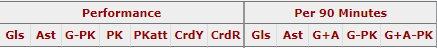 

As the superheadings were not included when we read in the data, these columns lost their superheading categorization. 

We'll need to rename these columns to avoid any confusion by including a `_p90` tag to the end of the column names. This will tell us when we're dealing with absolute value metric `Gls` versus the relative per 90 minutes counterpart `Gls_p90`, as an example.

In [11]:
stats18_19_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-18-19.csv")
stats18_19_df.head()
# ignazio turned 31

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Ismael Aaneba\Ismael-Aaneba,fr FRA,DF,Strasbourg,fr Ligue 1,19,1999,3,3,204,2.3,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.5,0.5,0.00,0.20,0.20,0.00,0.20,Matches
1,2,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,27,1990,36,36,3195,35.5,3,2,3,0,0,3,0,0.08,0.06,0.14,0.08,0.14,2.6,2.6,3.5,6.2,0.07,0.10,0.17,0.07,0.17,Matches
2,3,Ignazio Abate\Ignazio-Abate,it ITA,DF,Milan,it Serie A,31,1986,19,15,1302,14.5,0,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.3,0.4,0.00,0.02,0.02,0.00,0.02,Matches
3,4,Issah Abbas\Issah-Abbas,gh GHA,FW,Mainz 05,de Bundesliga,19,1998,1,0,9,0.1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.17,0.00,0.17,0.17,0.17,Matches
4,5,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,30,1987,38,38,3420,38.0,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,1.7,1.7,0.1,1.8,0.04,0.00,0.05,0.04,0.05,Matches


In [12]:
stats19_20_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-19-20.csv")
stats19_20_df.head()
# did ignazio retire? We just witnessed a whole career! 
# Patrick van aanholt did turn from 27 to 28 - looks good!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,29,29,2507,27.9,3,2,2,1,1,0,0,0.11,0.07,0.18,0.07,0.14,2.4,1.6,3.2,4.8,0.08,0.11,0.20,0.06,0.17,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36,36,3240,36.0,0,1,0,0,0,7,0,0.00,0.03,0.03,0.00,0.03,0.5,0.5,3.4,3.9,0.01,0.09,0.11,0.01,0.11,Matches
2,3,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28,28,2520,28.0,3,0,3,0,0,0,0,0.11,0.00,0.11,0.11,0.11,1.3,1.3,0.1,1.5,0.05,0.00,0.05,0.05,0.05,Matches
3,4,Suleiman Abdullahi\Suleiman-Abdullahi,ng NGA,FWMF,Union Berlin,de Bundesliga,22,1996,6,1,157,1.7,1,0,1,0,0,1,0,0.57,0.00,0.57,0.57,0.57,1.3,1.3,0.2,1.4,0.72,0.10,0.82,0.72,0.82,Matches
4,5,Mehdi Abeid\Mehdi-Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,25,20,1817,20.2,1,2,1,0,0,5,0,0.05,0.10,0.15,0.05,0.15,1.6,1.6,1.4,3.0,0.08,0.07,0.15,0.08,0.15,Matches


In [13]:
stats20_21_df = pd.read_csv("FormattedCapstoneData/CleanTop5L-20-21.csv")
stats20_21_df.head()
# patrick turned 29 in the final season of our datset meaning each year was read in correct sequential order!

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,1,Ismael Aaneba\Ismael-Aaneba,fr FRA,FWDF,Strasbourg,fr Ligue 1,21,1999,2,0,11,0.1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29,1990,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,Matches
2,3,Issah Abbas\Issah-Abbas,gh GHA,DFFW,Mainz 05,de Bundesliga,21,1998,2,0,18,0.2,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
3,4,Yunis Abdelhamid\Yunis-Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32,1987,33,33,2889,32.1,3,0,3,0,0,4,1,0.09,0.00,0.09,0.09,0.09,1.7,1.7,0.3,1.9,0.05,0.01,0.06,0.05,0.06,Matches
4,5,Sabit Abdulai\Sabit-Abdulai,gh GHA,MF,Getafe,es La Liga,21,1999,3,0,60,0.7,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


# Identifying Columns to Add / Remove / Clean

Based on the players progressively aging as we loaded in later seasons, we can see that we've read in each season's dataset in the correct sequential order! Now that we've finished this, we can make note of some things we'll need to add, remove, or modify in the datasets.

The first thing I'd like to include in each of our datasets is the year in which the season began. This will help us when we group by player names as we'll see the seasons a player played through their average. If the average is a value in the 2016-2020 range we'll know they only recently began playing in the top 5 european leagues. A lower average in this column (ex. 2010-2014) will tell us the player recently stopped playing in the top 5 european leagues.

Columns that can be removed are `Rk`, `Matches`, and `90s`. `Rk` will be removed as it was just the index from the tables we imported. `Matches` will be removed as it was HTML encoding on the website linking to the matches the respective player played in. Lastly, `90s` is simply the `Min` column (Minutes Played) divided by 90, therefore it can be considered redundant and removed.

The third set of columns that need to be modified are `Player`, `Nation`, and `Comp`. The `Player` column contains two versions of the player, the first version is the player's name including any accents or symbols in their name. The second is the player's name in plain-text with a dash instead of spaces. We'll keep the plain-text version for clarity.  The columns `Nation` and `Comp` represent the nationality of the player and the competition (League) in which the player plays in. Each of these columns has a short-form abbreviation preceeding the word of interest. On fbref.com the abbreviation seems to be encoding for flag emojis. For data purposes the emojis are unnecessary and we only want the values after them. We'll perform `.str.split` to identify where in each entry the words should be split so as to remove the flag emojis and keep the part of interest to us (that is the player's nationality or the league they're playing in). We'll also rename the `Comp` column to `League` as it's clearer to most what it's representing rather than "Competition".

Finally, as mentioned earlier, we'll need to address the duplicate columns names. These column names are duplicated because they originally were contained under a superheading organizing them under a "Per 90 Minutes" umbrella. We will keep the original column names but swap out the `.1` and add in a `_p90` tag instead. This way we can tell which metrics are measuring on a relative "Per 90 Minutes" scale by their column tag.

We'll perform these changes in a for loop going through each dataset individually before concatenating them all together.

## Cleaning All Datasets in For Loop

In [14]:
all_dfs = [stats10_11_df, stats11_12_df, stats12_13_df, stats13_14_df, stats14_15_df, stats15_16_df, stats16_17_df, stats17_18_df, stats18_19_df, stats19_20_df, stats20_21_df]

# choosing to enumerate in for loop to have a "status tracker" print as we begin our next df
# will also come in handy when identifying the later dfs that contain the "Expected" metrics

for i,df in enumerate(all_dfs):
    print(i)
    
    ### ADDING YEAR ###
    
    # including the year of the season taking place
    df["Year"] = 2010 + i
    # moves our new year column
    fifth_column = df.pop("Year")
    # inserts the column
    df.insert(5, "Year", fifth_column)
    
    ### DROPPING UNNECESSARY COLUMNS ###
    
    # Matches is a hyper-linked column that is unnecessary in the context of our data
    # Rank is also unnecessary as an index was auto-created starting at 0 when the datasets were read in
    # 90s is simply the Minutes column divided by 90. It's a bit redundant so we'll drop it.
    df.drop(columns=["Rk", "Matches", "90s"], axis=1, inplace=True)
  
    
    ### PLAYER NAME CLEANING ###
    # splits our player name into the name with accents and the text-friendly player name
    df[["Full Name", "Player_Name"]] = df["Player"].str.split(pat="\\", expand=True)
    # moves our text-friendly name to the front beside RK
    second_column = df.pop("Player_Name")
    # insert the column
    df.insert(2, "Player_Name", second_column)
    # drop the unclean columns used to create our clean one
    df.drop(columns=["Player", "Full Name"], axis=1, inplace=True)
    
    ### PLAYER NATIONALITY CLEANING ###
    # splits our player Nationality into the country name and the two letter country string (used for displaying emojis)
    df[["Emoji", "Nationality"]] = df["Nation"].str.split(pat=" ", expand=True)
    # moves our country name to the front to the front beside RK
    second_column = df.pop("Nationality")
    #insert the column
    df.insert(2, "Nationality", second_column)
    # drop the unclean columns used to create our clean one
    df.drop(columns=["Nation", "Emoji"], axis=1, inplace=True)
    
    ### PLAYER'S LEAGUE CLEANING ###
    # moves our League name to the old position of comp (after squad)
    fifth_column = df["Comp"].str.split(pat=" ", n=1, expand=True)[1]
    #insert the column
    df.insert(5, "League", fifth_column)
    # drop the unclean columns used to create our clean one
    df.drop(columns=["Comp"], axis=1, inplace=True)
    
    ### RENAMING REPEATED NAME COLUMNS ###
    df.rename(columns={
        "Gls.1": "Gls_p90",
        "Ast.1": "Ast_p90",
        "G+A": "G+A_p90",
        "G-PK.1": "G-PK_p90",
        "G+A-PK": "G+A-PK_p90"
    },
             inplace=True)
    ### RENAMING REPEATED NAME COLUMNS ###
    # only for the more recent dataframes that have the expected stats
    if i >= 7:
        df.rename(columns={
            "xG.1": "xG_p90",
            "xA.1": "xA_p90",
            "xG+xA": "xG+xA_p90",
            "npxG.1": "npxG_p90",
            "npxG+xA.1": "npxG+xA_p90"
        },
                 inplace=True)

0
1
2
3
4
5
6
7
8
9
10


Now that each individual dataset has been cleaned let's look at two to be sure our for loop worked as intended. We'll take one dataset that doesn't include the "Expected" metrics and one that does, just to be sure our column renaming worked on both.

In [15]:
# checking our for loops work part 1
stats10_11_df 
# looks good!

,Player_Name,Nationality,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,Fernando-Menegazzo,BRA,MF,Bordeaux,2010,Ligue 1,29.0,1981,35,34,2945,2,1.0,2,0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,Sergio-Abad-Beyxer,ESP,MF,Levante,2010,La Liga,21.0,1989,1,0,5,0,0.0,0,0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,Ignazio-Abate,ITA,DFMF,Milan,2010,Serie A,23.0,1986,29,26,2412,0,1.0,0,0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,Christian-Abbiati,ITA,GK,Milan,2010,Serie A,33.0,1977,35,35,3078,0,0.0,0,0,0.0,2,0,0.00,0.00,0.00,0.00,0.00
4,Mohammed-Abdellaoue,NOR,FW,Hannover 96,2010,Bundesliga,24.0,1985,26,26,2086,10,1.0,10,0,0.0,1,0,0.43,0.04,0.47,0.43,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,Ronald-Zubar,FRA,DF,Wolves,2010,Premier League,24.0,1985,15,14,1260,1,0.0,1,0,0.0,4,0,0.07,0.00,0.07,0.07,0.07
2695,Franco-Zuculini,ARG,MF,Genoa,2010,Serie A,19.0,1990,4,1,135,0,0.0,0,0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2696,Gianni-Zuiverloon,NED,DF,West Brom,2010,Premier League,23.0,1986,2,1,117,0,0.0,0,0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2697,Juan-Zuniga,COL,DFMF,Napoli,2010,Serie A,24.0,1985,27,15,1547,2,2.0,2,0,0.0,2,0,0.12,0.12,0.23,0.12,0.23


In [16]:
# checking our for loops work part 2
stats17_18_df
# looks good!

,Player_Name,Nationality,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,xG,npxG,xA,npxG+xA,xG_p90,xA_p90,xG+xA_p90,npxG_p90,npxG+xA_p90
0,Patrick-van-Aanholt,NED,DF,Crystal Palace,2017,Premier League,26.0,1990.0,28,25,2184,5,1,5,0,0,7,0,0.21,0.04,0.25,0.21,0.25,3.4,3.4,1.8,5.2,0.14,0.07,0.21,0.14,0.21
1,Rolando-Aarons,ENG,FWMF,Newcastle Utd,2017,Premier League,21.0,1995.0,4,1,139,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.0,0.2,0.10,0.00,0.10,0.10,0.10
2,Rolando-Aarons,ENG,MFFW,Hellas Verona,2017,Serie A,21.0,1995.0,11,6,517,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.2,0.2,0.2,0.5,0.04,0.04,0.08,0.04,0.08
3,Ignazio-Abate,ITA,DF,Milan,2017,Serie A,30.0,1986.0,17,11,1057,1,0,1,0,0,3,0,0.09,0.00,0.09,0.09,0.09,0.3,0.3,0.6,0.9,0.02,0.05,0.07,0.02,0.07
4,Aymen-Abdennour,TUN,DF,Marseille,2017,Ligue 1,27.0,1989.0,8,6,500,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.0,0.1,0.02,0.00,0.02,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Bongani-Zungu,RSA,MF,Amiens,2017,Ligue 1,24.0,1992.0,26,24,2084,1,0,1,0,0,5,0,0.04,0.00,0.04,0.04,0.04,0.3,0.3,1.0,1.4,0.01,0.04,0.06,0.01,0.06
2683,David-Zurutuza,ESP,MF,Real Sociedad,2017,La Liga,31.0,1986.0,31,26,2236,0,2,0,0,0,2,0,0.00,0.08,0.08,0.00,0.08,2.3,2.3,1.1,3.4,0.09,0.05,0.14,0.09,0.14
2684,Filip-Djuricic,SRB,FW,Sampdoria,2017,Serie A,25.0,1992.0,1,0,7,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.60,0.60,0.00,0.60
2685,Filip-Djuricic,SRB,FWMF,Benevento,2017,Serie A,25.0,1992.0,15,13,971,0,1,0,0,0,1,0,0.00,0.09,0.09,0.00,0.09,0.6,0.6,1.6,2.3,0.06,0.15,0.21,0.06,0.21


Our for loop worked well! All columns that needed modifying have been fixed and our datasets are ready to be concatenated together into one big 11-season dataset!

In [17]:
# now that we've dealt with year specific columns we can concatenate every year
# together into one big dataframe
stats_df = pd.concat(all_dfs, ignore_index=True)

In [18]:
# checking it worked out
stats_df

,Player_Name,Nationality,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,xG,npxG,xA,npxG+xA,xG_p90,xA_p90,xG+xA_p90,npxG_p90,npxG+xA_p90
0,Fernando-Menegazzo,BRA,MF,Bordeaux,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sergio-Abad-Beyxer,ESP,MF,Levante,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ignazio-Abate,ITA,DFMF,Milan,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Christian-Abbiati,ITA,GK,Milan,2010,Serie A,33.0,1977.0,35,35,3078,0,0.0,0.0,0.0,0.0,2,0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mohammed-Abdellaoue,NOR,FW,Hannover 96,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30002,Steven-Zuber,SUI,DFMF,Eint Frankfurt,2020,Bundesliga,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46,0.8,0.8,1.9,2.7,0.12,0.29,0.41,0.12,0.41
30003,Martin-Zubimendi,ESP,MF,Real Sociedad,2020,La Liga,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00,0.6,0.6,0.6,1.1,0.03,0.03,0.05,0.03,0.05
30004,Martin-Odegaard,NOR,MF,Arsenal,2020,Premier League,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31,1.1,1.1,2.1,3.2,0.11,0.22,0.33,0.11,0.33
30005,Martin-Odegaard,NOR,MFFW,Real Madrid,2020,La Liga,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.4,0.5,0.04,0.15,0.19,0.04,0.19


Now that we've created our one big dataset. Let's create our data dictionary to clarify what each column means for anyone who may follow along in our process.

# Data Dictionary

- `Player_Name` - Player's Name
- `Nationality` - Player's Nationality
- `Pos` - Player's Position (can be more than one value)
- `Squad` - Player's Team
- `Year` - Year the season started
- `League` - Name of the League the player plays in
- `Age` - Player's Age
- `Born` - Player's birth year
- `MP` - Matches played
- `Starts` - Games started by player
- `Min` - Minutes played
- `Gls` - Goals scored by player
- `Ast` - Assists by player
- `G-PK` - Non-penalty Goals
- `PK` - Penalty kick goals scored
- `PKatt` - Penalty kicks attempted
- `CrdY` - Yellow Cards
- `CrdR` - Red Cards
- `Gls_p90` - Goals per 90 minutes
- `Ast_p90` - Assists per 90 minutes
- `G+A_p90` - Goals + Assists per 90 minutes
- `G-PK_p90` - Goals - Penalty Kick goals per 90 minutes
- `G+A-PK_p90` - Goals + Assists - Penalty Kick Goals per 90 minutes

In the season of 2017-2018 and onward, we begun to see new tracking which included new columns:

- `xG` - Expected Goals
- `npxG` - Non-penalty expected Goals
- `xA` - Expected Assists
- `npxG+xA` - Non-penalty expected Goals + expected Assists
- `xG_p90` - Expected goals per 90 minutes
- `xA_p90` - Expected assists per 90 minutes
- `xG+xA_p90` - Expected goals + assists per 90 minutes
- `npxG_p90` - Non-penalty expected Goals per 90 minutes
- `npxG+xA_p90` - Non-penalty expected Goals + expected Assists per 90 minutes

Now that we've established what the meaning behind each column name is, let's begin to deal with the null values (if any) in our dataset.

# Dealing with Missing Values

In [19]:
# initial check
stats_df.isna().sum()

Player_Name        0
Nationality       12
Pos               10
Squad              0
Year               0
League             0
Age               12
Born              11
MP                 0
Starts             0
Min                0
Gls                0
Ast                2
G-PK               2
PK                 2
PKatt              7
CrdY               0
CrdR               0
Gls_p90            0
Ast_p90            2
G+A_p90            2
G-PK_p90           2
G+A-PK_p90         4
xG             19120
npxG           19120
xA             19120
npxG+xA        19120
xG_p90         19121
xA_p90         19121
xG+xA_p90      19121
npxG_p90       19121
npxG+xA_p90    19121
dtype: int64

Our first area of concern is the 7 seasons preceding the year they added the "Expected" metrics. For those 7 season, the values for the "Expected" metrics are all missing as they were not tracked.

## Dropping the Expected Metrics Columns

The expected columns with prefix `x` in them are predictive metrics (Expected Goals, Expected Assists) rather than recorded metrics from a player's current or past season. We're going to drop these columns due to the following reason:

1. As mentioned above, these are predictive metrics rather than concrete.
2. The focus is on finding players that are close to the level of a player **currently**.
3. The values are incomplete for a large majority of the rows as the metrics only began being tracked in 2017.
4. Creating our own values for these metrics is not possible given the metrics we currently have. Expected type metrics require very granular stats such as total shots, average distance from goal shots are taken, etc.
5. Different sources create their "Expected" metrics from different factors as mentioned above, some may place a higher value on total shots versus the distance from where the shots are taken. As these values are not concrete their formulation is a subjective process.

For these reasons, particularly reason #4, we'll be dropping these columns.

In [20]:
# dropping the "expected" columns
# using inplace to save our df after
stats_df.drop(columns=['xG', 'npxG', 'xA', 'npxG+xA', 'xG_p90', 'xA_p90', 'xG+xA_p90', 'npxG_p90', 'npxG+xA_p90'], inplace=True)

Now that we've dealt with an extremely large amount of the null values, let's approach the next column containing missing values.

In [21]:
# what's next on the list
stats_df.isna().sum()

Player_Name     0
Nationality    12
Pos            10
Squad           0
Year            0
League          0
Age            12
Born           11
MP              0
Starts          0
Min             0
Gls             0
Ast             2
G-PK            2
PK              2
PKatt           7
CrdY            0
CrdR            0
Gls_p90         0
Ast_p90         2
G+A_p90         2
G-PK_p90        2
G+A-PK_p90      4
dtype: int64

## Dropping Nationality

We've got 12 rows where the Nationality of the player is missing. Since the goal with our dataset is to find similar players based on their playing statistics, `Nationality` won't have any effect on how they perform on the pitch. We can drop this column. 

In [22]:
stats_df["Nationality"].value_counts()

ESP    4229
FRA    3764
ITA    3176
GER    2541
ENG    2102
       ... 
LAO       1
NAM       1
BER       1
MSR       1
FRO       1
Name: Nationality, Length: 148, dtype: int64

It's also not feasible to OneHotEncode 148 nationalities for all the players. We'll drop this column now.

In [23]:
# dropping the nationality column
# using inplace=True to save the dataframe
stats_df.drop(columns="Nationality", axis=1, inplace=True)

In [24]:
# check that it worked
stats_df.head() 
# nationality is gone - good!

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,Fernando-Menegazzo,MF,Bordeaux,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,Sergio-Abad-Beyxer,MF,Levante,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,Ignazio-Abate,DFMF,Milan,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,Christian-Abbiati,GK,Milan,2010,Serie A,33.0,1977.0,35,35,3078,0,0.0,0.0,0.0,0.0,2,0,0.00,0.00,0.00,0.00,0.00
4,Mohammed-Abdellaoue,FW,Hannover 96,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47


Now that we've dealt with Nationality. Let's take a look at our next column to deal with.

In [25]:
# what's next on the list
stats_df.isna().sum()

Player_Name     0
Pos            10
Squad           0
Year            0
League          0
Age            12
Born           11
MP              0
Starts          0
Min             0
Gls             0
Ast             2
G-PK            2
PK              2
PKatt           7
CrdY            0
CrdR            0
Gls_p90         0
Ast_p90         2
G+A_p90         2
G-PK_p90        2
G+A-PK_p90      4
dtype: int64

## Missing Positions, Age, and Birth year

There are 10 rows in this dataset that contain players with missing positions. First we'll find what rows those are. Then we'll see if the player appears in the dataset more than once, if so we can assign their missing position with the filled in position elsewhere in the dataset.

In [26]:
# finding players with missing positions
missing_position = stats_df["Pos"].isna()

# Locating the missing position players in our dataset
stats_df.loc[missing_position, :]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
8171,Marco-Vittiglio,NaN,Pescara,2012,Serie A,NaN,NaN,1,0,23,1,0.0,1.0,0.0,0.0,0,0,3.91,0.0,3.91,3.91,3.91
10915,Cedric-Orengo,NaN,Ajaccio,2013,Ligue 1,NaN,NaN,2,0,26,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
10916,Elia-Bruzzi,NaN,Livorno,2013,Serie A,NaN,NaN,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
10917,Pierre-Moracchini,NaN,Ajaccio,2013,Ligue 1,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
13606,Geremy-Broh,NaN,Parma,2014,Serie A,NaN,NaN,1,0,9,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
13607,Malick-Seck,NaN,Lens,2014,Ligue 1,NaN,NaN,1,0,6,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
13608,Mirko-Esposito,NaN,Parma,2014,Serie A,NaN,NaN,1,0,2,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
19106,Giorgio-Spizzichino,NaN,Lazio,2016,Serie A,NaN,NaN,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
19107,Giuseppe-Borello,NaN,Crotone,2016,Serie A,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00
21794,Christian-Rutjens,NaN,Benevento,2017,Serie A,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.00,0.0,0.00,0.00,0.00


Let's create a list of the players names who are missing their `Pos` in their entry. We can also see from the results above that the player's who are missing their `Pos` are also missing their `Age` and `Born` columns. We will likely have to fill in these values manually but at least we can fill all 3 columns per player in one go.

Now let's create the list of players with missing `Pos`.

In [27]:
missing_pos_players = stats_df["Player_Name"][stats_df["Pos"].isnull()]
missing_pos_players

8171         Marco-Vittiglio
10915          Cedric-Orengo
10916            Elia-Bruzzi
10917      Pierre-Moracchini
13606            Geremy-Broh
13607            Malick-Seck
13608         Mirko-Esposito
19106    Giorgio-Spizzichino
19107       Giuseppe-Borello
21794      Christian-Rutjens
Name: Player_Name, dtype: object

Now that we've got our list of player names, let's create a for loop to go through each player's name and search our entire dataset to see if the player occurs more than once. If the player does we may be able to replace our missing values without going to outside sources like Transfermarkt.

In [29]:
# Creating a for loop to go through each player and find if they have multiple occurences

for player in missing_pos_players:
    # pulls the name of the player and their metrics wherever it's found in the data set
    display(stats_df[stats_df["Player_Name"] == f"{player}"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
8171,Marco-Vittiglio,NaN,Pescara,2012,Serie A,NaN,NaN,1,0,23,1,0.0,1.0,0.0,0.0,0,0,3.91,0.0,3.91,3.91,3.91


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10915,Cedric-Orengo,NaN,Ajaccio,2013,Ligue 1,NaN,NaN,2,0,26,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10916,Elia-Bruzzi,NaN,Livorno,2013,Serie A,NaN,NaN,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10917,Pierre-Moracchini,NaN,Ajaccio,2013,Ligue 1,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13606,Geremy-Broh,NaN,Parma,2014,Serie A,NaN,NaN,1,0,9,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13607,Malick-Seck,NaN,Lens,2014,Ligue 1,NaN,NaN,1,0,6,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13608,Mirko-Esposito,NaN,Parma,2014,Serie A,NaN,NaN,1,0,2,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
19106,Giorgio-Spizzichino,NaN,Lazio,2016,Serie A,NaN,NaN,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
19107,Giuseppe-Borello,NaN,Crotone,2016,Serie A,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
21794,Christian-Rutjens,NaN,Benevento,2017,Serie A,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


Each player in our list that's missing their `Pos` value only appears once. We'll have to find their respective `Pos`, `Age` and `Born` (Birth year) through Google or Transfermarkt as mentioned earlier.

Let's begin manually entering the missing fields for our 10 players. Our process will be as follows:
1. Display their row with missing values.
2. Fill in the missing values `Pos`, `Age`, `Born` using `.loc` on their index and manually inputting the values provided by searching Transfermarkt.
3. Display their row again to make sure we've filled the correct player's metrics.
4. Move onto next player, repeating the steps.

In [30]:
# for our first player
display(stats_df[stats_df["Player_Name"] == f"Marco-Vittiglio"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
8171,Marco-Vittiglio,NaN,Pescara,2012,Serie A,NaN,NaN,1,0,23,1,0.0,1.0,0.0,0.0,0,0,3.91,0.0,3.91,3.91,3.91


In [31]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[8171, ["Pos", "Age", "Born"]] = "DF", 18.0, 1994

In [32]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Marco-Vittiglio"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
8171,Marco-Vittiglio,DF,Pescara,2012,Serie A,18.0,1994.0,1,0,23,1,0.0,1.0,0.0,0.0,0,0,3.91,0.0,3.91,3.91,3.91


In [33]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Cedric-Orengo"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10915,Cedric-Orengo,NaN,Ajaccio,2013,Ligue 1,NaN,NaN,2,0,26,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [34]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[10915, ["Pos", "Age", "Born"]] = "DF", 18.0, 1995

In [35]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Cedric-Orengo"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10915,Cedric-Orengo,DF,Ajaccio,2013,Ligue 1,18.0,1995.0,2,0,26,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [36]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Elia-Bruzzi"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10916,Elia-Bruzzi,NaN,Livorno,2013,Serie A,NaN,NaN,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [37]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[10916, ["Pos", "Age", "Born"]] = "FW", 18.0, 1995

In [38]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Elia-Bruzzi"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10916,Elia-Bruzzi,FW,Livorno,2013,Serie A,18.0,1995.0,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [39]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Pierre-Moracchini"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10917,Pierre-Moracchini,NaN,Ajaccio,2013,Ligue 1,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [40]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[10917, ["Pos", "Age", "Born"]] = "MF", 19.0, 1994

In [41]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Pierre-Moracchini"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
10917,Pierre-Moracchini,MF,Ajaccio,2013,Ligue 1,19.0,1994.0,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [42]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Geremy-Broh"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13606,Geremy-Broh,NaN,Parma,2014,Serie A,NaN,NaN,1,0,9,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [43]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[13606, ["Pos", "Age", "Born"]] = "MF", 17.0, 1997

In [44]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Geremy-Broh"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13606,Geremy-Broh,MF,Parma,2014,Serie A,17.0,1997.0,1,0,9,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [45]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Malick-Seck"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13607,Malick-Seck,NaN,Lens,2014,Ligue 1,NaN,NaN,1,0,6,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [46]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[13607, ["Pos", "Age", "Born"]] = "FW", 24.0, 1990

In [47]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Malick-Seck"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13607,Malick-Seck,FW,Lens,2014,Ligue 1,24.0,1990.0,1,0,6,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [48]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Mirko-Esposito"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13608,Mirko-Esposito,NaN,Parma,2014,Serie A,NaN,NaN,1,0,2,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [49]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[13608, ["Pos", "Age", "Born"]] = "DF", 18.0, 1996

In [50]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Mirko-Esposito"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
13608,Mirko-Esposito,DF,Parma,2014,Serie A,18.0,1996.0,1,0,2,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [51]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Giorgio-Spizzichino"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
19106,Giorgio-Spizzichino,NaN,Lazio,2016,Serie A,NaN,NaN,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [52]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[19106, ["Pos", "Age", "Born"]] = "DF", 17.0, 1999

In [53]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Giorgio-Spizzichino"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
19106,Giorgio-Spizzichino,DF,Lazio,2016,Serie A,17.0,1999.0,1,0,12,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [54]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Giuseppe-Borello"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
19107,Giuseppe-Borello,NaN,Crotone,2016,Serie A,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [55]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[19107, ["Pos", "Age", "Born"]] = "FW", 17.0, 1999

In [56]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Giuseppe-Borello"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
19107,Giuseppe-Borello,FW,Crotone,2016,Serie A,17.0,1999.0,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [57]:
# displaying next player
display(stats_df[stats_df["Player_Name"] == "Christian-Rutjens"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
21794,Christian-Rutjens,NaN,Benevento,2017,Serie A,NaN,NaN,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [58]:
# replacing the players NA values with info from Transfermarkt by searching their name and the season they played
# https://www.transfermarkt.us/
stats_df.loc[21794, ["Pos", "Age", "Born"]] = "DF", 19.0, 1998

In [59]:
# check that it worked - looks good!
display(stats_df[stats_df["Player_Name"] == "Christian-Rutjens"])

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
21794,Christian-Rutjens,DF,Benevento,2017,Serie A,19.0,1998.0,1,0,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


That's our last player with a missing `Pos` value.

Now that we've filled all missing positions, let's remove all goalkeepers from our dataset. The focus of our analysis is identifying playstyles of **outfield** players as there is much more variety on how outfield players can play rather than goalkeepers which are a more one-dimensional role. Goalkeepers will not be necessary in our dataset so we will remove them now before heading on to our next missing values column.

## Removing Goalkeepers

Since the focus of our analysis is on outfield players, goalkeepers won't be needed in our dataset. We'll go ahead and drop any player that has their position as `GK`. Let's find out just how many goalkeepers there are in our dataset.

In [61]:
# pulling rows where the position of the player contains the string GK
stats_df[stats_df["Pos"].str.contains("GK")]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
3,Christian-Abbiati,GK,Milan,2010,Serie A,33.0,1977.0,35,35,3078,0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.0,0.0
20,Antonio-Adan,GK,Real Madrid,2010,La Liga,23.0,1987.0,3,2,260,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
24,Rene-Adler,GK,Leverkusen,2010,Bundesliga,25.0,1985.0,32,32,2880,0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.0,0.0
30,Michael-Agazzi,GK,Cagliari,2010,Serie A,26.0,1984.0,38,38,3383,0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0
39,Ali-Ahamada,GK,Toulouse,2010,Ligue 1,18.0,1991.0,9,8,726,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29956,Ruben-Yanez,GK,Getafe,2020,La Liga,26.0,1993.0,10,10,900,0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.0,0.0
29961,Yoel,GK,Eibar,2020,La Liga,31.0,1988.0,4,3,300,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
29989,Robin-Zentner,GK,Mainz 05,2020,Bundesliga,25.0,1994.0,31,31,2790,0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,0.0,0.0,0.0
29992,Ron-Robert-Zieler,GK,K�ln,2020,Bundesliga,31.0,1989.0,1,0,51,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [62]:
# grabs the shape of the gk df
drop_gks = stats_df[stats_df["Pos"].str.contains("GK")].shape[0]
drop_gks

2333

Wow! There were 2,333 goalkeepers in our dataset. Let's do some checks to make sure we'll be dropping the exact amount of rows (only GKs) just before we do.

In [64]:
# the shape of our dataframe before we drop our GKs
pre_gk_drop_df_shape = stats_df.shape[0]
pre_gk_drop_df_shape

30007

The number of rows including goalkeepers is 30,007. Let's check if the number of rows in our dataframe with player's that **are not** goalkeepers equals the number of rows in our current dataframe minus the number of rows in the goalkeeper dataframe.

In [65]:
# verifies that we'll only be dropping our GKs in the dataframe we're wanting
stats_df[stats_df["Pos"].str.contains("GK")==False].shape[0] == pre_gk_drop_df_shape - drop_gks
# Looks good! let's drop our GKs now

True

We received a `True` which mean's we've got the green light to drop our goalkeepers, let's do that now.

In [66]:
# taking a copy of the dataframe where there are no goalkeepers
# resetting the index as well
stats_df2 = stats_df[stats_df["Pos"].str.contains("GK")==False].reset_index(drop=True).copy()

In [67]:
# check that it worked
stats_df2
# looks good!

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
0,Fernando-Menegazzo,MF,Bordeaux,2010,Ligue 1,29.0,1981.0,35,34,2945,2,1.0,2.0,0.0,0.0,7,0,0.06,0.03,0.09,0.06,0.09
1,Sergio-Abad-Beyxer,MF,Levante,2010,La Liga,21.0,1989.0,1,0,5,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00
2,Ignazio-Abate,DFMF,Milan,2010,Serie A,23.0,1986.0,29,26,2412,0,1.0,0.0,0.0,0.0,2,1,0.00,0.04,0.04,0.00,0.04
3,Mohammed-Abdellaoue,FW,Hannover 96,2010,Bundesliga,24.0,1985.0,26,26,2086,10,1.0,10.0,0.0,0.0,1,0,0.43,0.04,0.47,0.43,0.47
4,Yacine-Abdessadki,MF,Freiburg,2010,Bundesliga,29.0,1981.0,21,20,1753,0,0.0,0.0,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,Steven-Zuber,DFMF,Eint Frankfurt,2020,Bundesliga,28.0,1991.0,20,6,585,0,3.0,0.0,0.0,0.0,1,0,0.00,0.46,0.46,0.00,0.46
27670,Martin-Zubimendi,MF,Real Sociedad,2020,La Liga,21.0,1999.0,31,17,1882,0,0.0,0.0,0.0,0.0,6,0,0.00,0.00,0.00,0.00,0.00
27671,Martin-Odegaard,MF,Arsenal,2020,Premier League,21.0,1998.0,14,9,866,1,2.0,1.0,0.0,0.0,0,0,0.10,0.21,0.31,0.10,0.31
27672,Martin-Odegaard,MFFW,Real Madrid,2020,La Liga,21.0,1998.0,7,3,234,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00


Now that we've completed our detour to remove goalkeepers, let's get back on the main route and look at the next column that contains missing values.

In [68]:
stats_df2.isna().sum()

Player_Name    0
Pos            0
Squad          0
Year           0
League         0
Age            1
Born           0
MP             0
Starts         0
Min            0
Gls            0
Ast            2
G-PK           0
PK             0
PKatt          5
CrdY           0
CrdR           0
Gls_p90        0
Ast_p90        2
G+A_p90        2
G-PK_p90       0
G+A-PK_p90     2
dtype: int64

##  Missing Age

We've only got one player left who is missing their age, let's pull him up now.

In [69]:
# finding missing Ages
missing_age = stats_df2["Age"].isna()

# locating the missing values
stats_df2.loc[missing_age, :]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
1845,Nikola-Petkovic,DF,Eint Frankfurt,2010,Bundesliga,NaN,1996.0,1,1,80,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


That's strange, the player's `Age` is missing yet their `Born` (birth year) is filled in, let's just subtract their birth year from the current season they're in to fill in their `Age`.

In [70]:
# Since the player is not missing their birth year, we can assign their age by taking the season they were present - their birthyear
stats_df2.loc[1845, "Age"] = stats_df2.loc[1845, "Year"] - stats_df2.loc[1845, "Born"]

In [71]:
# check that it worked - looks good!
stats_df2[stats_df2["Player_Name"] == "Nikola-Petkovic"]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
1845,Nikola-Petkovic,DF,Eint Frankfurt,2010,Bundesliga,14.0,1996.0,1,1,80,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


We've now dealt with the last missing `Age` value. Let's see what we've got to deal with next.

In [72]:
stats_df2.isna().sum()

Player_Name    0
Pos            0
Squad          0
Year           0
League         0
Age            0
Born           0
MP             0
Starts         0
Min            0
Gls            0
Ast            2
G-PK           0
PK             0
PKatt          5
CrdY           0
CrdR           0
Gls_p90        0
Ast_p90        2
G+A_p90        2
G-PK_p90       0
G+A-PK_p90     2
dtype: int64

## Missing Assists

We've only got a few values left where the values are NaN. Next we'll deal with Assists, referenced in the dataset as `Ast`.

In [73]:
# players who have NaN for their assists
missing_ast = stats_df2["Ast"].isna()

# finding the players in the dataset, displaying the entire row
stats_df2.loc[missing_ast, :]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
207,Marc-Bartra,DF,Barcelona,2010,La Liga,19.0,1991.0,2,2,180,1,NaN,1.0,0.0,NaN,0,0,0.5,NaN,NaN,0.5,NaN
2000,Sergi-Roberto,DFMF,Barcelona,2010,La Liga,18.0,1992.0,1,1,90,0,NaN,0.0,0.0,NaN,0,0,0.0,NaN,NaN,0.0,NaN


We can see that these two players missing their Assists column are also the same ones missing their `Ast_p90`, `G+A_p90`, and `G+A-PK_p90`. If we can get their `Ast` column filled, we can address the remaining columns as well since it's the sum of their column titles divided by their MP. Let's see if we can pull their Assists in the 2010 season from Transfermarkt.

In [74]:
# Dealing with Sergi Roberto's assists
# https://www.transfermarkt.com/sergi-roberto/leistungsdatendetails/spieler/85370/plus/0?saison=2010&verein=&liga=&wettbewerb=&pos=&trainer_id=
stats_df2.loc[207, "Ast"] = 1.0

In [75]:
# Dealing with Marc Bartra's Assists
# https://www.transfermarkt.com/marc-bartra/leistungsdatendetails/spieler/99922/plus/0?saison=2010&verein=&liga=&wettbewerb=&pos=&trainer_id=
stats_df2.loc[2000, "Ast"] = 0.0

## Missing `Ast_p90`, `G+A_p90`, `G+A-PK_p90`

Now that we've dealt with their assists, we can deal with their remaining missing metrics which are in the `_p90` area. These metrics can be done without going to outside sources as they're derived from the absolute value stats. We'll make a for loop to fix the stats for each player.

In [76]:
# locating both the players via their index value
stats_df2.loc[[207, 2000], :]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
207,Marc-Bartra,DF,Barcelona,2010,La Liga,19.0,1991.0,2,2,180,1,1.0,1.0,0.0,NaN,0,0,0.5,NaN,NaN,0.5,NaN
2000,Sergi-Roberto,DFMF,Barcelona,2010,La Liga,18.0,1992.0,1,1,90,0,0.0,0.0,0.0,NaN,0,0,0.0,NaN,NaN,0.0,NaN


In [77]:
# putting our two players into a list
missing_metrics_players = [207, 2000]

# for each player in our list
for player in missing_metrics_players:
    
    # Dealing with their Assists per 90 = Total Assists / Matches Played (90 Min)
    stats_df2.loc[player, "Ast_p90"] = stats_df2.loc[player, "Ast"] / stats_df2.loc[player, "MP"]
    
    # Dealing with their G+A per 90 = Total G + A / Matches played (90 min)
    stats_df2.loc[player, "G+A_p90"] = (stats_df2.loc[player, "Ast"] + stats_df2.loc[player, "Gls"]) / stats_df2.loc[player, "MP"]
    
    # Dealing their G+A-PK per 90 
    # will be same result as their g+a/90 as they didnt take any penalties but the formula is different
    stats_df2.loc[player, "G+A-PK_p90"] = (stats_df2.loc[player, "Ast"] + stats_df2.loc[player, "Gls"] + stats_df2.loc[player, "PK"]) / stats_df2.loc[player, "MP"]

Now that we've gone through our for loop and fixed the player's metrics, let's check to see if it worked.

In [78]:
# Check to see if it worked
stats_df2.loc[[207, 2000], :]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
207,Marc-Bartra,DF,Barcelona,2010,La Liga,19.0,1991.0,2,2,180,1,1.0,1.0,0.0,NaN,0,0,0.5,0.5,1.0,0.5,1.0
2000,Sergi-Roberto,DFMF,Barcelona,2010,La Liga,18.0,1992.0,1,1,90,0,0.0,0.0,0.0,NaN,0,0,0.0,0.0,0.0,0.0,0.0


Great! We've dealt with the values we initially set out for with these players. We can see that they still have the `PKatt` column missing but we will deal with those values next along with any other players who may have that value missing.

In [79]:
# checking what's next
stats_df2.isna().sum()

Player_Name    0
Pos            0
Squad          0
Year           0
League         0
Age            0
Born           0
MP             0
Starts         0
Min            0
Gls            0
Ast            0
G-PK           0
PK             0
PKatt          5
CrdY           0
CrdR           0
Gls_p90        0
Ast_p90        0
G+A_p90        0
G-PK_p90       0
G+A-PK_p90     0
dtype: int64

## Missing Penalty Kick Attempts

The final column we need to deal with is Penalty Kick attempts. Let's look first at the 5 players who are missing this value.

In [80]:
# finding out which players are missing PK attempts
missing_pk_att = stats_df2["PKatt"].isna()

# locating them in the dataset
stats_df2.loc[missing_pk_att, :]

,Player_Name,Pos,Squad,Year,League,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls_p90,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90
207,Marc-Bartra,DF,Barcelona,2010,La Liga,19.0,1991.0,2,2,180,1,1.0,1.0,0.0,NaN,0,0,0.50,0.50,1.00,0.50,1.00
840,Seba-Fernandez,FW,M�laga,2010,La Liga,25.0,1985.0,30,21,1900,7,4.0,7.0,0.0,NaN,3,0,0.33,0.19,0.52,0.33,0.52
1128,Natxo-Insa,MF,Villarreal,2010,La Liga,24.0,1986.0,1,0,11,0,0.0,0.0,0.0,NaN,0,0,0.00,0.00,0.00,0.00,0.00
2000,Sergi-Roberto,DFMF,Barcelona,2010,La Liga,18.0,1992.0,1,1,90,0,0.0,0.0,0.0,NaN,0,0,0.00,0.00,0.00,0.00,0.00
2304,Carlos-Tomas,DF,Villarreal,2010,La Liga,22.0,1988.0,1,1,90,0,0.0,0.0,0.0,NaN,0,0,0.00,0.00,0.00,0.00,0.00


Out of the 5 players missing the `PKatt` 4 of them are defenders / midfielders so it's highly unlikely they're taking a penalty in the first place. For those players, we'll fill a 0 for `PKatt`. The last player `Seba Fernandez` could've taken a penalty in his 30 matches played over the season but we can't say for sure. What we can assume is that since he has 0 `PK` goals its unlikely he did take a penalty (as they more often than not end up being a goal). This metric is pretty niche and it would be hard to find replacement values for so we'll have to assume he took 0 penalty kicks as well. 

In summary, all 5 missing `PKatt` entries will be filled with 0.

In [81]:
# taking the players who were missing PK attempts and inputting the value as 0
stats_df2.loc[missing_pk_att, "PKatt"] = 0.0

In [82]:
# final check for missing values part 1
stats_df2.isna().sum()

Player_Name    0
Pos            0
Squad          0
Year           0
League         0
Age            0
Born           0
MP             0
Starts         0
Min            0
Gls            0
Ast            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
Gls_p90        0
Ast_p90        0
G+A_p90        0
G-PK_p90       0
G+A-PK_p90     0
dtype: int64

In [85]:
# final check for missing values part 2
stats_df2.isna().sum().sum()

0

We've successfully dealt with all our missing or NaN values in our dataset! We can now begin to do some exploratory data analysis.

Before we begin our EDA let's save our new cleaned dataframe to a CSV.

In [84]:
stats_df2.to_csv(path_or_buf="FormattedCapstoneData/stats_df2.csv")

Now that we've saved our dataset with no missing values, let's conclude this notebook before we move onto EDA.

# Conclusion

In this notebook we performed the following steps to make our dataset ready for Exploratory Data Analysis and modelling later:
1. Read in each season's dataset.
2. Identified the columns that need to be modified, cleaned, or removed.
3. Cleaned the identified columns in each dataset using a for loop.
4. Concatenated all the seasons into one big dataset.
5. Created a Data Dictionary for our dataset.
6. Dealt with all missing values in our datasets.

To continue reading on head to the second notebook labeled ***2. Initial EDA***.